<h1 align="center">Facial Recognition Demo</h1>

### Description
This project implements the Eigenfaces method for facial recognition, a technique rooted in principal component analysis (PCA). The process involves subtracting the "mean face" from each face in the database, centering the data, and projecting it onto a lower-dimensional subspace. This approach highlights key facial features while reducing computational complexity through a low-rank approximation of the dataset. This file demostrates the usage of the FacialRec class.

In [13]:
from matplotlib import pyplot as plt
from facial_recognition import FacialRec, sample_faces

Upon instantiation, the `FacialRec` class loads image files from the specified path. The faces are flattened and stored as columns in the `original_faces` attribute. The `mean_face`, representing the average of all the images, is computed and subtracted from each column in `original_faces` to produce the `shifted_faces`. This step centers the data for subsequent analysis.

In [14]:
fr = FacialRec(path='./faces94')

The `show` method can be used to view any of the faces stored in `original_faces`, `shifted_faces`, or the `mean_face`. 

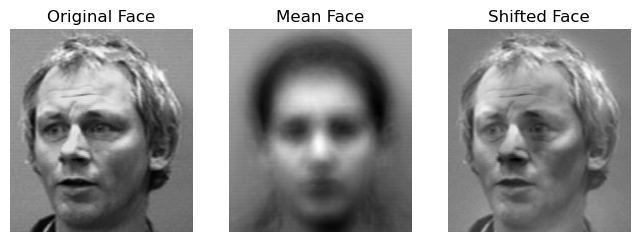

In [15]:
plt.figure(figsize=(8, 4))
plt.subplot(131)
fr.show(fr.original_faces[:, 0])
plt.title('Original Face')
plt.subplot(132)
fr.show(fr.mean_face)
plt.title('Mean Face')
plt.subplot(133)
fr.show(fr.shifted_faces[:, 0])
plt.title('Shifted Face')
plt.show()

The eigenvectors of the `shifted_faces` matrix are then computed using Singular Value Decomposition (SVD). These eigenvectors form an eigenbasis, stored in the `u` attribute, and are referred to as eigenfaces. Each eigenface captures a principal direction of variance in the dataset.

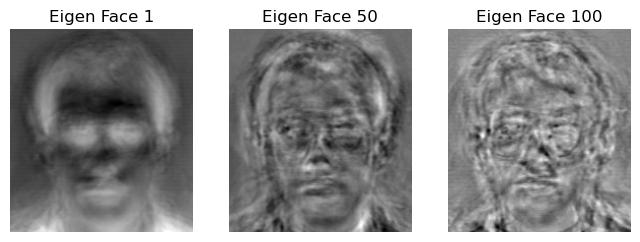

In [16]:
plt.figure(figsize=(8, 4))
plt.subplot(131)
fr.show(fr.u[:, 0])
plt.title('Eigen Face 1')
plt.subplot(132)
fr.show(fr.u[:, 49])
plt.title('Eigen Face 50')
plt.subplot(133)
fr.show(fr.u[:, 99])
plt.title('Eigen Face 100')
plt.show()

The eigenfaces are ordered by the amount of variance (information) they capture. This means that any face in the dataset can be approximately reconstructed by projecting its `shifted_face` onto the eigenfaces. The reconstruction involves a weighted sum of the eigenfaces, where the weights correspond to the projections, and the `mean_face`. The more eigenfaces used, the closer the reconstruction is to the original image.

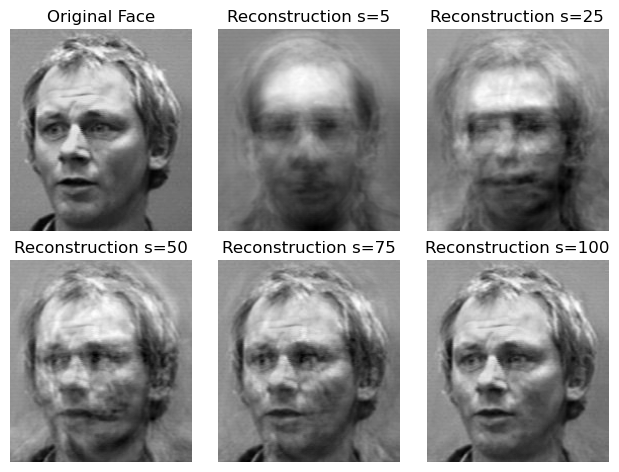

In [17]:
plt.subplot(231)
fr.show(fr.original_faces[:, 0])
plt.title('Original Face')

image = fr.shifted_faces[:, 0]
s_values = [5, 25, 50, 75, 100]
for i, s in enumerate(s_values):
    projection = fr.project(image, s)
    reconstruction = (fr.u[:, :s] @ projection) + fr.mean_face
    plt.subplot(232 + i)
    fr.show(reconstruction)
    plt.title(f'Reconstruction s={s}')
plt.tight_layout()

When a new image is processed, it is first centered by subtracting the `mean_face` and then projected onto a lower-dimensional subspace spanned by the first `s` eigenfaces. This projection yields a compact representation of the face. The representation is then compared to the compact representations of the dataset faces to find the closest match. 

This is done with the `match` method. The `sample_faces` method selects faces at random from the `original_faces` and the match method determines its closest match using the method described above.

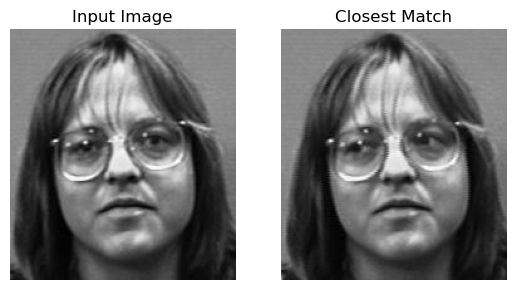

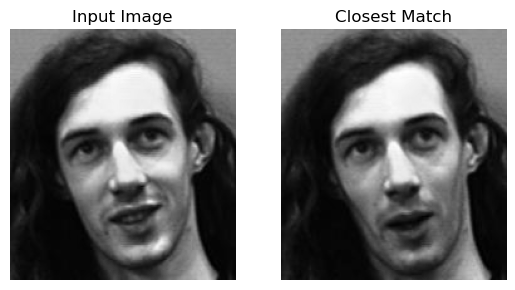

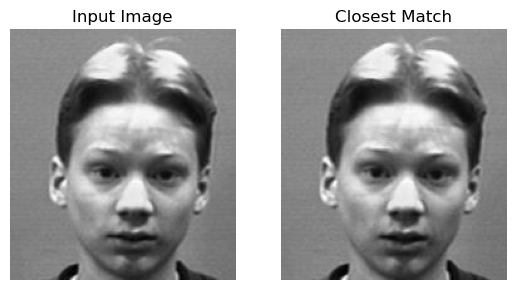

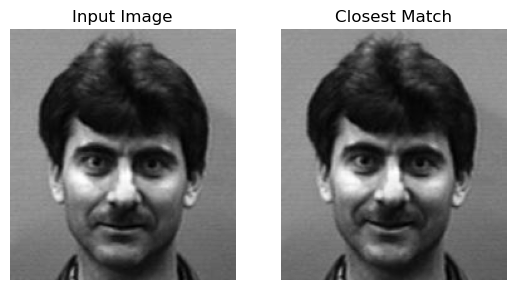

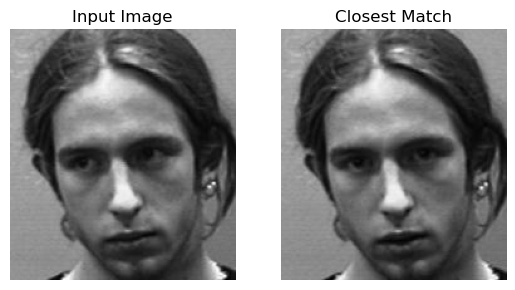

In [18]:
for face in sample_faces(5):
    best_match = fr.match(face, s=20)

This method significantly reduces both memory and computation requirements. Instead of storing and processing high-dimensional images, only the `mean_face`, a set of eigenfaces, and low-dimensional representations are used. For example, if each image has 36,000 pixels and there are 1,000 images, using 50 eigenfaces reduces the storage from 36 million values to just 1.836 million values. Additionally, the reduced dimensionality accelerates operations such as face matching, as comparisons are performed on much smaller vectors.